# Comenzamos el proyecto

## Abrimos el dataset

Importamos las librerias que utilizaremos en el poyecto.

In [1]:
# Librerias
import pandas
import numpy
import matplotlib.pyplot as plt
from scipy import stats as st

Abrimos el dataset para la lectura de informacion

In [2]:
df_games = pandas.read_csv('/datasets/games.csv')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparamos los datos

### - Remplazamos los nombres de las columnas

Dejamos los nombres en minusculas

In [3]:
df_games.columns=df_games.columns.str.lower()
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### - Eliminamos y rellenamos los datos ausentes

Tenemos datos ausentes por lo que no podremos transformar el tipo de datos sin antes revisar estos datos ausentes, realizaremos acciones diferentes para cada columna del dataframe.

- name: Eliminaremos filas de datos ausentes.
- platform: No hay datos ausentes
- year_of_release: Son datos numericos por los que lo dejaremos como 0 ya que no sabemos su año
- genre: Los datos ausentes los declararemos como 'unknown'
- sales: No hay datos ausentes
- critic_score: Los datos ausentes los dejaremos como 0
- user_score: Los datos ausentes los dejaremos como 
- rating: Los datos ausentes los dejaremos como 'unknown'
   
En resumen, en las columnas de tipo 'object' los datos ausentes seran 'unknown' y los de tipo numerico seran 0, eliminamos las 2 filas de datos ausentes en las columnas 'name' ya que en este caso especial son pocas filas y al revisarlas podemos ver que le faltan demasiados datos solo tienen los datos de 'year_of_release' y 'sales' que son datos demasiados bajos por lo que en caso de realizar estudios estadisticos afectarian de forma casi nula los calculos.

Puedo entender que los valores ausentes son por que en los score y rating muchas veces en juegos no reciben de estos datos al no ser juegos muy populares o a la hora de su creacion no tienen en cuenta obtener estos datos para darle un rating a la hora publicarlo. 

Puede observar las filas que menciono en el siguiente codigo.


In [4]:
print(df_games[df_games['name'].isnull()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


Comenzamos a trabajar con los datos ausentes.

In [5]:
# Eliminamos las filas de la columna 'name'
df_games.dropna(subset=['name'],inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
# Rellenamos los datos ausentes de 'rating' con 'unknown'
df_games['rating'].fillna('unknown',inplace=True)
# Rellenamos los datos ausentes que solo son numericos con 0
df_games.fillna(0,inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Convertimos los datos en los tipos correspondientes.

Convertiremos las siguientes columnas:

- year_of_release: Convertimos de float a int
- critic_score: Convertimos de float a int
- user_score: Convertimos de object a float

La columna 'user_score' tiene datos 'tbd' por lo que entendemos lo siguiente, al no ser datos nulos podemos entender que son datos que vienen en camino al dataset, pero como son 2424 filas que no podemos eliminarlas y tampoco podemos remplazarlas ya que pueden ser datos que estamos esperando que despues no sabremos cuales datos eran para remplazar.

La accion que recomiendo y haremos es aislar estos datos en un nuevo DataFrame, lo llamaremos 'df_tbd' y en el DataFrame original 'df_games eliminaremos estas filas.

Tendremos este 'df_tbd' como respaldo en caso de tener que agregarlo de nuevo al DataFrame original con los datos ya completos, y mas importante aun, sin alterar los calculos estadisticos en el DataFrame original.

In [7]:
# Contamos los datos que son 'tbd'
print('Contamos las filas que cuenten con los datos "tbd"')
print(df_games[df_games['user_score']=='tbd'].count())
# Sabiendo cuantas son podemos conocer el tamaño que deberia tener nuestro nuevo DataFrame
df_tbd=df_games[df_games['user_score']=='tbd']
print()
print('Mostramos la informacion del nuevo DataFrame')
df_tbd.info()
# Eliminamos las filas del DataFrame 'df_games'
df_games.drop(df_games[df_games['user_score']=='tbd'].index,inplace=True)
print()
print('Verificamos que las filas fueron eliminadas')
df_games.info()

Contamos las filas que cuenten con los datos "tbd"
name               2424
platform           2424
year_of_release    2424
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       2424
user_score         2424
rating             2424
dtype: int64

Mostramos la informacion del nuevo DataFrame
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 119 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2424 non-null   object 
 1   platform         2424 non-null   object 
 2   year_of_release  2424 non-null   float64
 3   genre            2424 non-null   object 
 4   na_sales         2424 non-null   float64
 5   eu_sales         2424 non-null   float64
 6   jp_sales         2424 non-null   float64
 7   other_sales      2424 non-null   float64
 8   critic_score     2424 non-null   float64
 9   user_

In [8]:
# Ahora si podemos convertir las columnas en el tipo deseado para realizar los calculos posteriores.
df_games = df_games.astype({'year_of_release': 'int64', 'critic_score': 'int64','user_score':'float64'})
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14289 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14289 non-null  int64  
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     14289 non-null  int64  
 9   user_score       14289 non-null  float64
 10  rating           14289 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.3+ MB


### Creamos la columna de venta totales para cada juego

Calculamos las ventas totales (la suma de las ventas en todas las regiones) para
cada juego y coloca estos valores en una columna separada

In [9]:
#Declaramos una variables que contendra la suma de las ventas por regiones
total_sales=[]
for i in range(len(df_games)):
    sum_sales=0
    sum_sales= df_games.iloc[i]['na_sales']+df_games.iloc[i]['eu_sales']+df_games.iloc[i]['jp_sales']+df_games.iloc[i]['other_sales']
    total_sales.append(sum_sales)
df_games['total_sales']=total_sales
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14289 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14289 non-null  object 
 1   platform         14289 non-null  object 
 2   year_of_release  14289 non-null  int64  
 3   genre            14289 non-null  object 
 4   na_sales         14289 non-null  float64
 5   eu_sales         14289 non-null  float64
 6   jp_sales         14289 non-null  float64
 7   other_sales      14289 non-null  float64
 8   critic_score     14289 non-null  int64  
 9   user_score       14289 non-null  float64
 10  rating           14289 non-null  object 
 11  total_sales      14289 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.4+ MB


## Analizamos los datos

- ¿Cuántos juegos fueron lanzados en diferentes años? ¿Son significativos los datos de cada período?

Podemos observar en el grafico que el juego con mayor cantidad de juegos lanzados fue el 2008, y que entre los años 2001 y 2006 hubo una alza significativa de lanzamientos.

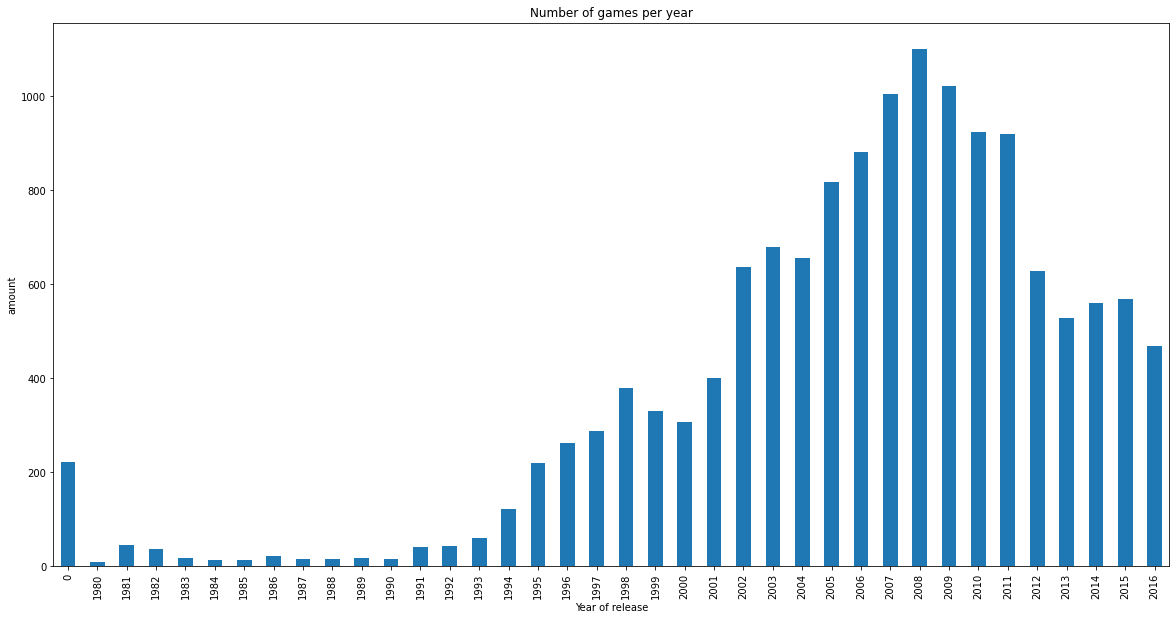

In [10]:
df_games.groupby(by='year_of_release',).count().plot(y='name',kind='bar',figsize=(20,10),title='Number of games per year',xlabel='Year of release',ylabel='amount',legend=False)
plt.show()

- ¿Cómo varían las ventas de una plataforma a otra?. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Podemos observar que las ventas de una consola a otra varian bastante por el tipo de consola, si es portatil o no, la mayoria de consolas con mayores ventas son consolas que no son portatiles, a excepcion de las dos ultimas consolas en el top 6 que corresponden a consolas portatiles, y bueno las consolas con menos ventas corresponden a las mas antiguas por que probablemente no se pudieron rescatar los registros de ventas en papel para el dataset y a la popularidad de las consolas viejas por su momento en que habian mas centro de juegos en esos años, cabe destacar que las consolas con menos ventas corresponden en su mayoria a consolas portatiles.

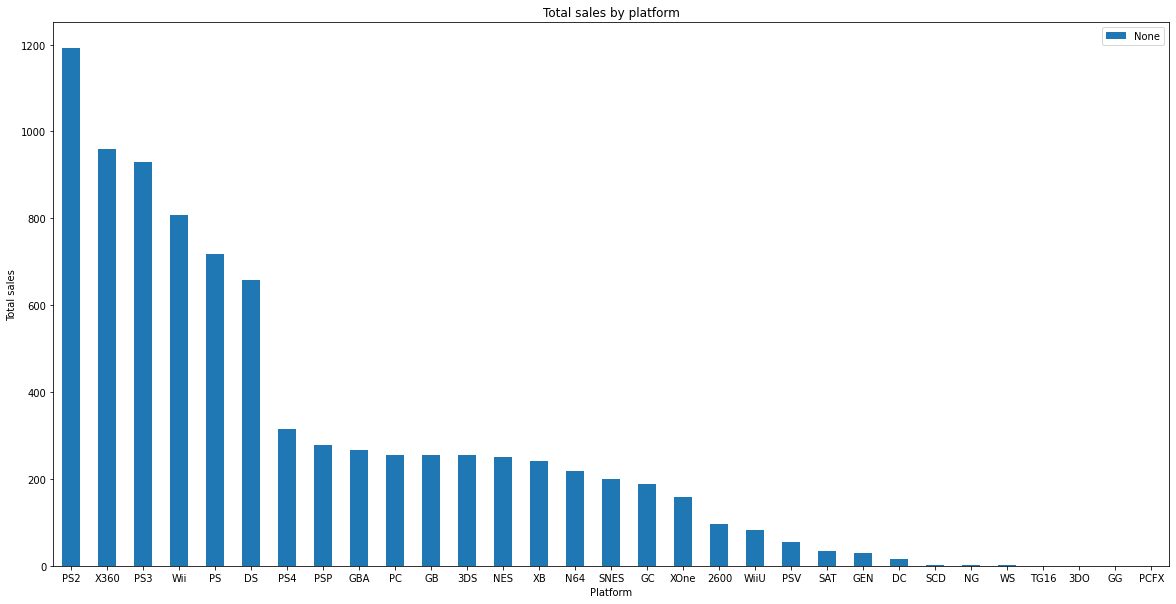

In [11]:
#Esta tabla pivot sera la madre de nuestras futuras tablas
pivot_sum_platform_year=pandas.pivot_table(df_games,values="total_sales",index=["year_of_release"],columns=["platform"], aggfunc='sum')
# Generamos una tabla para poder comparar las ventas totales de cada plataforma.
top_platform_year=pivot_sum_platform_year.sum().sort_values(ascending=False)
top_platform_year.plot(kind='bar',figsize=(20,10),title='Total sales by platform',xlabel='Platform',ylabel='Total sales',legend=True,rot=0)
plt.show()

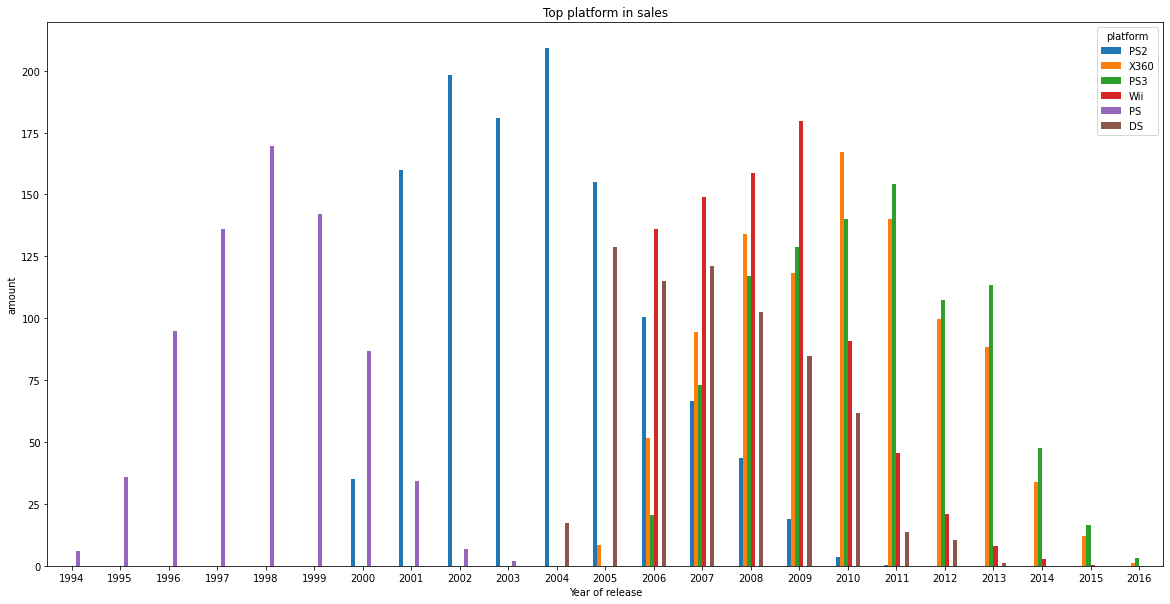

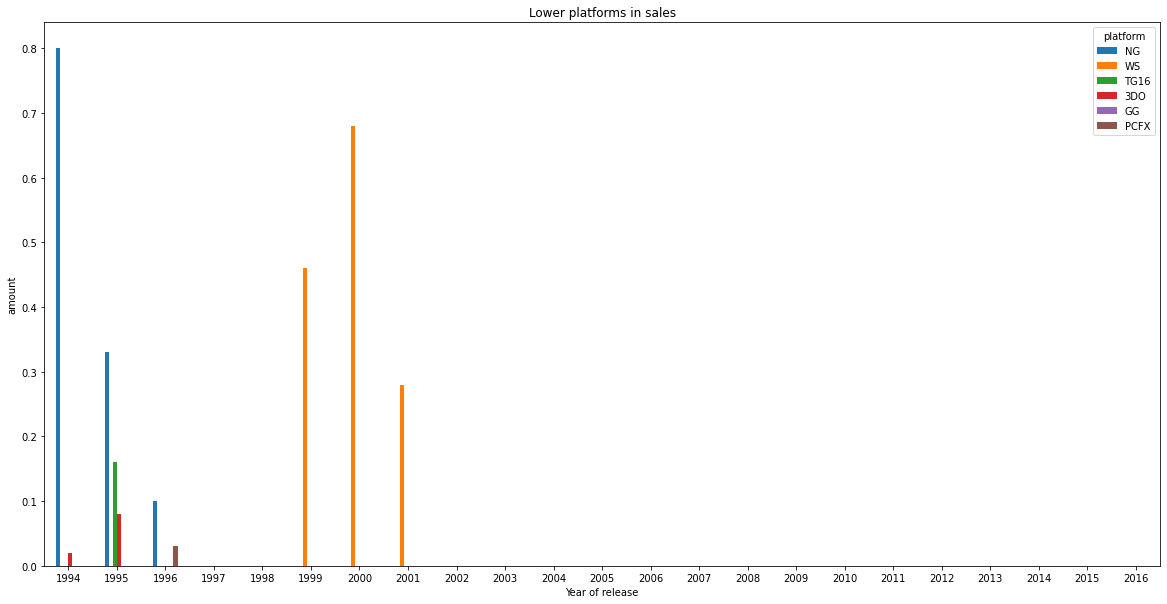

In [12]:
pivot_sum_platform_year.loc[1994:,top_platform_year.head(6).index.tolist()].plot(kind='bar',figsize=(20,10),legend=True,rot=0,title='Top platform in sales',xlabel='Year of release',ylabel='amount')
pivot_sum_platform_year.loc[1994:,top_platform_year.tail(6).index.tolist()].plot(kind='bar',figsize=(20,10),legend=True,rot=0,title='Lower platforms in sales',xlabel='Year of release',ylabel='amount')
plt.show()

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables

-Las plataformas lideres en ventas son la PS2, Xbox 360, PS3, Wii, PS y DS.

-Todas las consolas van en crecimieno hasta llegar a un peak y reducen poco a poco pero en la consola Wii esta crece por 3 años seguidos pero reduce sus ventas drasticamente posteriormente.
 
-Las plataformas potencialmente rentables son la PS2 y la Xbox 360 ya que sus ventas varian poco en sus años de venta.

- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

-Son muy significativas las diferencias entre cada plataforma cuando hablamos de ventas totales, hay demasiadas plataformas con grandes ventas, pero a la hora de hablar del promedio de las ventas cambian rotundamentes la presentacion de los graficos demostrando que 3 consolas que estan por encima por mucho en el maximo hasta incluso el 3er cuartil en comparacion a las otras paltaformas 

<AxesSubplot:title={'center':'Sales Average by platform'}, ylabel='Sales Average'>

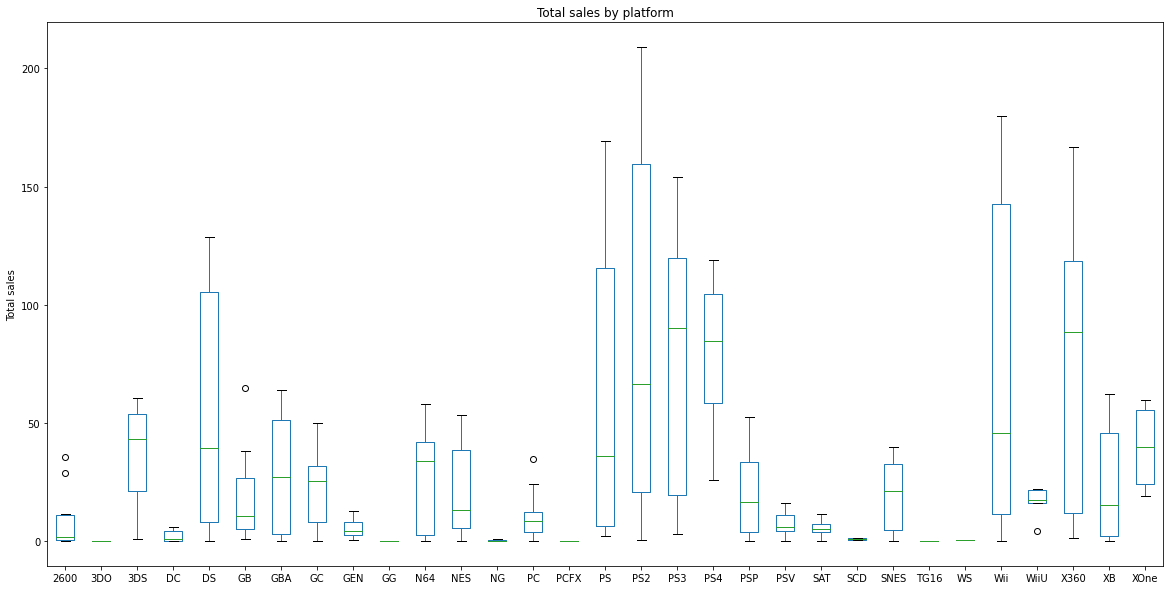

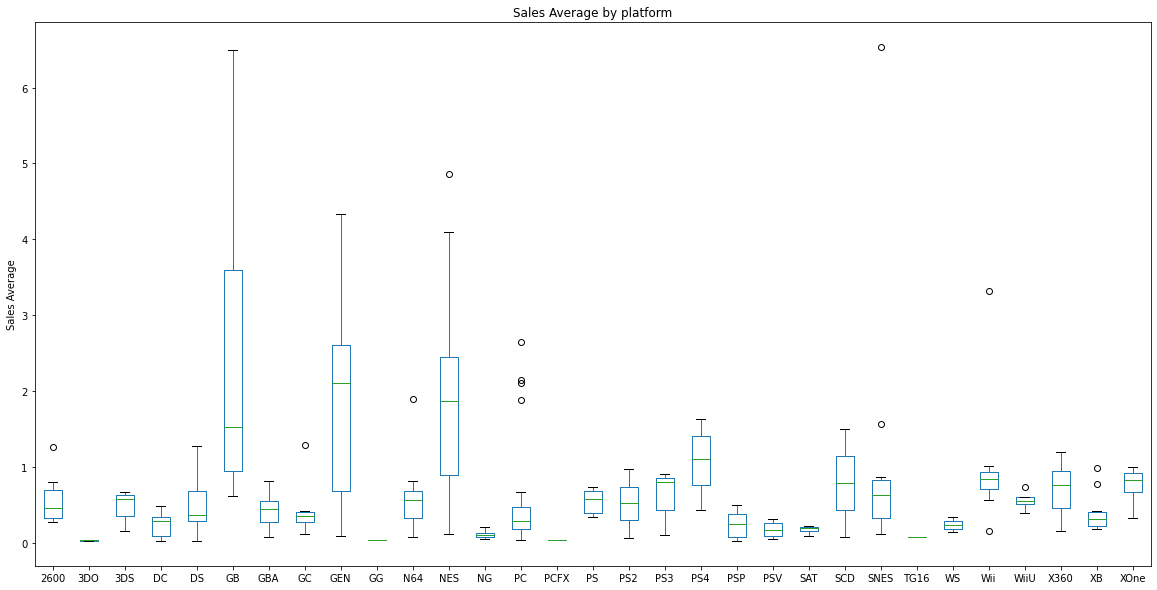

In [13]:
# Grafico de diagrama de caja para ventas globales
pivot_sum_platform_year.plot(kind='box',figsize=(20,10),title='Total sales by platform',xlabel='Platform',ylabel='Total sales',legend=True,rot=0)
# Creamos una tabla pivote pero en vez de la ventas totales, sera con el promedio de las ventas
pivot_mean_platform_year=pandas.pivot_table(df_games,values="total_sales",index=["year_of_release"],columns=["platform"], aggfunc='mean')
# Graficamos un diagrama de caja pero con el promedio de las ventas por plataforma
pivot_mean_platform_year.plot(kind='box',figsize=(20,10),title='Sales Average by platform',xlabel='Platform',ylabel='Sales Average',legend=True,rot=0)

- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Creamos un gráfico de dispersión y calculamos la correlación entre las reseñas y las ventas.

Podemos concluir que que las criticas son bajas para cada juego en comparacion con sus ventas, las criticas de usuario de un juego en la plataforma PS2 afecta en poca medida las ventas.

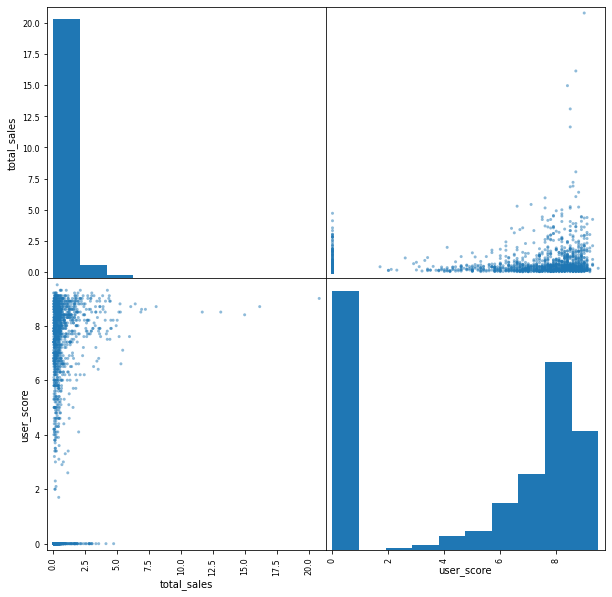

In [14]:
pivot_score_sales_ps2=pandas.pivot_table(df_games[df_games["platform"]=='PS2'],values=["total_sales",'user_score'],index=["name"], aggfunc='sum')
pandas.plotting.scatter_matrix(pivot_score_sales_ps2,figsize=(10,10))
plt.show()

- Teniendo en cuenta las conclusiones comparamos las ventas de los mismos juegos en otra plataforma que seria en este caso Xbox 360.

Tenemos resultados similares pero podemos observar un incremento en valoraciones altas en criticas de usuarios correspondiente a las ventas.

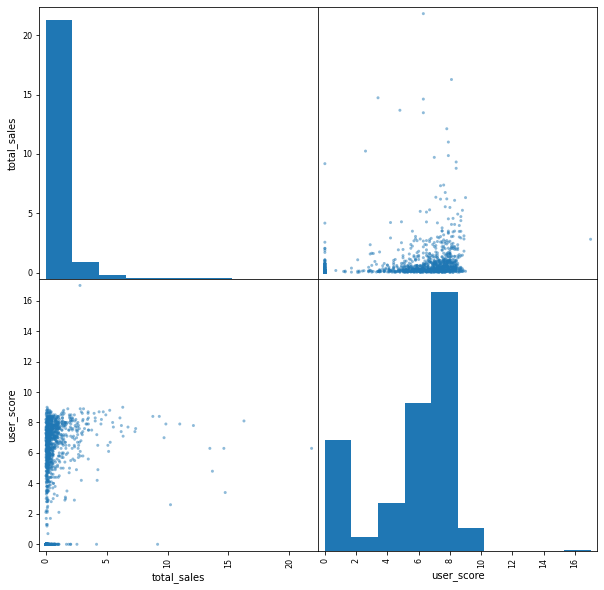

In [15]:
pivot_score_sales_x360=pandas.pivot_table(df_games[df_games["platform"]=='X360'],values=["total_sales",'user_score'],index=["name"], aggfunc='sum')
pandas.plotting.scatter_matrix(pivot_score_sales_x360,figsize=(10,10))
plt.show()

- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

El genero mas rentable es 'Accion' y el menos rentables es 'Estrategia'

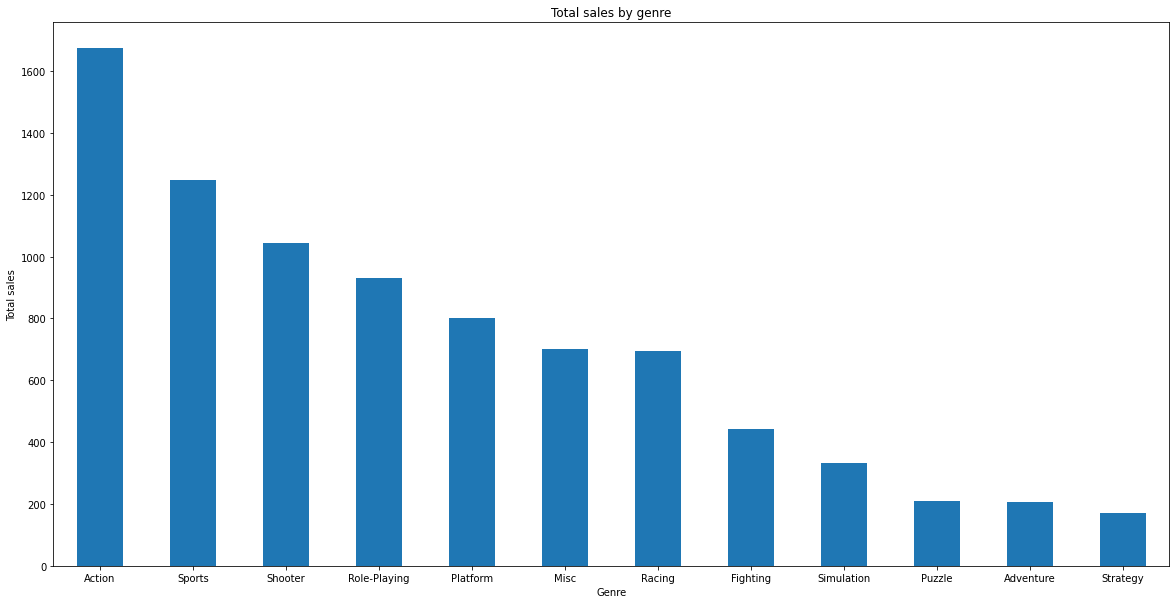

In [16]:
# Creamos una tabla pivote con las ventas totales por genero.
pivot_sum_genre_sales=pandas.pivot_table(df_games,values="total_sales",index=["genre"], aggfunc='sum')
# Ordenamos las ventas totales para tener un grafico mas facil de leer.
top_genre_sales=pivot_sum_genre_sales.sort_values(by="total_sales",ascending=False)
# Graficamos un diagrama de caja pero con el promedio de las ventas por plataforma
top_genre_sales.plot(kind='bar',figsize=(20,10),title='Total sales by genre',xlabel='Genre',ylabel='Total sales',legend=False,rot=0)
plt.show()

## Creamos un perfil de usuario para cada region

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Podemos ver que las ventas en Japon son las ventas mas bajas en todas las plataformas principales, le sigue Europa y en todas las plataformas las ventas de NorteAmerica superan las demas regiones en todas las plataformas.

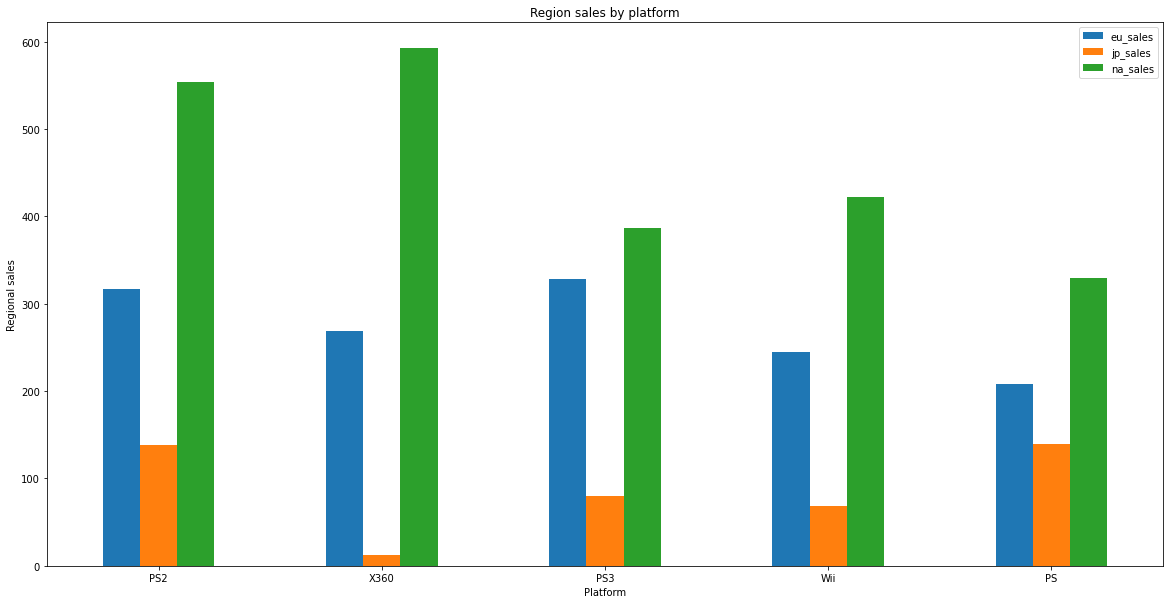

In [17]:
#Esta tabla pivot sera para ver las ventas por regiones para cada consola
pivot_platform_rg_sales=pandas.pivot_table(df_games,values=["jp_sales",'eu_sales','na_sales'],index=["platform"], aggfunc='sum')
# Generamos una tabla para poder comparar las ventas por regiones, las plataformas mas principales las sacamos de la tabla pivot 'top_platform_year'.
pivot_platform_rg_sales.loc[top_platform_year.head(5).index.tolist()].plot(kind='bar',figsize=(20,10),title='Region sales by platform',xlabel='Platform',ylabel='Regional sales',legend=True,rot=0)
plt.show()

- Los cinco géneros principales. Explica la diferencia.

Podemos ver segun las ventas por regiones, observamos que en norteamerica las ventas son las mas altas en la mayoria de los generos por excepcion en los juegos de rol donde japon lidera en ventas pero norteamerica a pesar de quedar por debajo de japon no es mucha la diferencia.

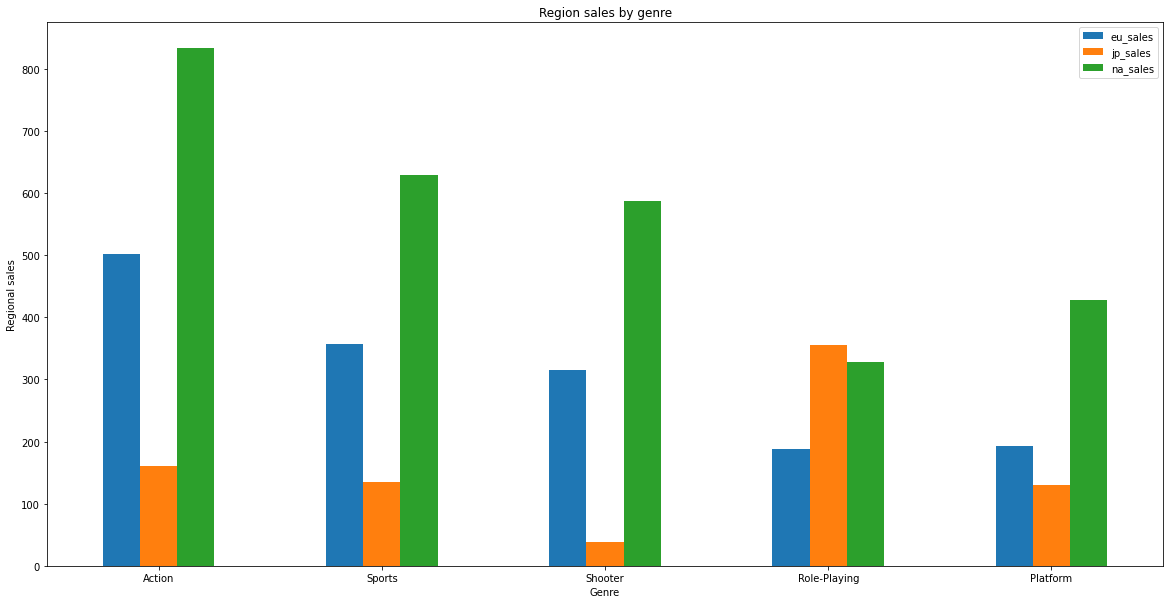

In [18]:
#Esta tabla pivot sera para ver las ventas por regiones para cada genero
pivot_platform_genre_sales=pandas.pivot_table(df_games,values=["jp_sales",'eu_sales','na_sales'],index=["genre"], aggfunc='sum')
# Generamos una tabla para poder comparar las ventas por regiones, los generos mas principales las sacamos de la tabla pivot 'top_genre_sales'.
pivot_platform_genre_sales.loc[top_genre_sales.head(5).index.tolist()].plot(kind='bar',figsize=(20,10),title='Region sales by genre',xlabel='Genre',ylabel='Regional sales',legend=True,rot=0)
plt.show()

- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales

-Las clasificaciones si afectan las ventas por region, podemos verlos en las clasificaciones 'E', 'M' Y 'T'.

Eso si tenemos varios juegos con una clasificacion desconocida asi que no tenemos los calculos finales integros.

<AxesSubplot:title={'center':'Region sales by rating'}, xlabel='ESBR', ylabel='Regional sales'>

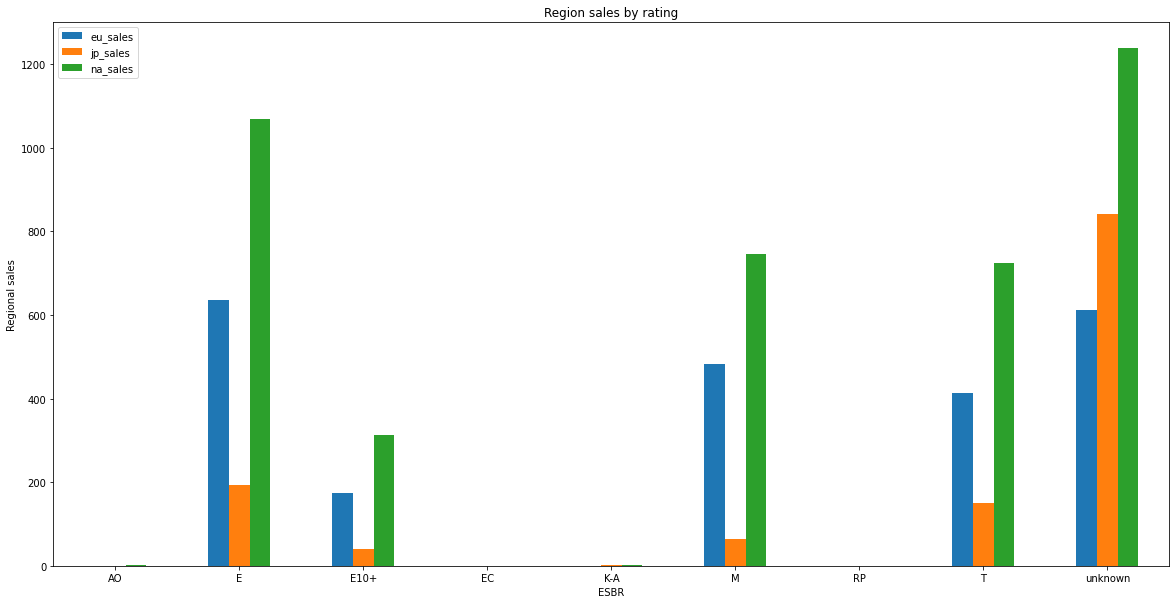

In [19]:
#Esta tabla pivot sera para ver las ventas por regiones para cada genero
pivot_platform_rating_sales=pandas.pivot_table(df_games,values=["jp_sales",'eu_sales','na_sales'],index=["rating"], aggfunc='sum')
# Generamos una tabla para poder comparar las ventas por regiones, los generos mas principales las sacamos de la tabla pivot 'top_genre_sales'.
pivot_platform_rating_sales.plot(kind='bar',figsize=(20,10),title='Region sales by rating',xlabel='ESBR',ylabel='Regional sales',legend=True,rot=0)
#plt.show()

## Hipotesis

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Rechazamos la hipotesis nula por lo que las calificaciones promedio entre ambas platatod

In [23]:
#Designmanos un valor para alpha
alpha = 0.05

sales_pc = df_games[df_games['platform']=='PC']
sales_pc = sales_pc['total_sales']
sales_xbox_one = df_games[df_games['platform']=='XOne']
sales_xbox_one = sales_xbox_one['total_sales']
results = st.ttest_ind(sales_pc,sales_xbox_one,equal_var = True)
print('p-value: ', results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

p-value:  4.493588928022302e-12
Rechazamos la hipótesis nula


In [ ]:
<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>


- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

No podemos rechazar la hipotesis por lo que no son podemos decir que son diferentes las calificaciones promedio de ambos generos.

In [21]:
sales_action = df_games[df_games['genre']=='Action']
sales_action = sales_action['total_sales']
sales_sports = df_games[df_games['genre']=='Sports']
sales_sports = sales_sports['total_sales']
results = st.ttest_ind(sales_action,sales_sports,equal_var = False)
print('p-value: ', results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

p-value:  0.12915040147871237
No podemos rechazar la hipótesis nula


## Conclusiones

Se concluye que las ventas en norteamerica son las mas altas en las plataformas mas populares y en los generos tambien, norteamerica es el lugar donde tenemos un mayor mercado para vender juegos en especial los juegos de los 5 generos mas vendidos.

Osea que si queremos generar aun mayores ganancias debemos concentrar los juegos para el publico norteamericano, puede ser arriesgado solo centrarnos en una region pero el mercado europeo coencidia en los mismos generos populares que en norteamerica por lo que estariamos aumentando ganancias en ambas regiones,  En cambio en Japon podemos concentrarnos en hacer juegos de rol de multiplataforma ya que todas las plataformas populares obtienen ventas en esa region pero los juegos de rol son donde mas provecho podemos sacar al mercado japones.